In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

banco.avif


**PROYECTO PARA FIDELIZACIÓN DE CLIENTES "APEX BANK"**

RESUMEN: el presente proyecto fue encargado por la Gerencia Comercial de Apex Bank con la intención de aumentar la tasa de fidelización de la cartera de clientes, elaborando políticas de retención especialmente direccionadas a aquellos clientes que se considera tendrán una menor probabilidad de abandonar el banco.

CONTEXTO COMERCIAL: Apex Bank le encargo al departamento de "Data Sciencie & Analytics" el análisis de una muestra reducida de su cartera de clientes. Para definir la muestra se ha optado por aquellos países en donde el banco tiene una fuerte presencia, pero que de acuerdo a los últimos informes recibidos de cada región, se puede observar una reducción en los ingresos financieros. La Gerencia Comercial quiere poder anticipar el abandono de clientes, para de esta forma dirigir a ellos políticas de fidelización (tales como promociones, descuentos, beneficios y productos adicionales), para de esta forma recomponer los ingresos regionales.

En una etapa inicial, se ha solicitado al Banco que nos provea información respecto a la cartera de clientes de aquellos países con mayores tasas de perdida de cartera de clientes que afectan de forma directa a los ingresos del banco. Las características o variables de dicha cartera de encuenta detallada en el presente trabajo en la sección de composición del dataset.

Se procedió a realizar un análisis explotario de los datos con la intención de obtener información relevante respecto a la composición de la cartera de clientes y ver si había relaciones líneales que pudieran observarse respecto al por qué de la decisión de algunos clientes de abandonar el banco.

Fue necesario abordar una serie de hipótesis, las cuales se resumen a continuación:

1- ¿Existe una relación directa entre la residencia del cliente y su decisión o no de permanecer como cliente del banco?
2- ¿Existe una relación directa entre el género del cliente y su decisión o no de permanecer como cliente del banco?
3- ¿Existe algún tipo de relación entre cada variable individualmente con la intención de abandonar el banco?

Del análisis realizado, se pudo observar que la tasa de abandono es superior en Alemania, pero que no había relación entre el género del cliente y su decisión de dejar el banco. Tampoco pudo observarse una relación lineal directa entre la tasa de abandono y la antigüedad de cada cliente, o entre la tasa de abandono y el saldo en la cuenta bancaria.
No se observaron datos nulos o faltantes, ni datos outliers relevantes.



---



# **1 - ANÁLISIS EXPLOTARIO DE DATOS (EDA)**

# **Descripción del dataset**

---

RowNumber: número de filas del 1 al 10.000.

CustomerId: código de identificación único para cada cliente adignado por el banco.

Surname: apellido del cliente.

CreditScore: puntaje de crédito del cliente. Tiene un rango de 300 a 850.

Geography: país de residencia del cliente.

Gender: género del cliente.

Age: edad del cliente (years)

Tenure: cantidad de años que el cliente está en el banco.

Balance: saldo bancario del cliente. (Euros)

NumOfProducts: número de productos que el cliente tiene contratados con el banco.

HasCrCard: indica si el cliente tiene una tarjeta de crédito con el banco (0= N=, 1 = SI)

IsActiveMember: indica si el cliente es considerado miembro activo.

EstimatedSalary: sueldo anual estimado del cliente (Euros)

Exited: indica si el cliente ha dejado el banco (0= NO, 1 = SI)


In [243]:

url="https://raw.githubusercontent.com/javierbarbera/DataScience_Parte2/main/Churn_Modelling.csv"
df= pd.read_csv(url,sep=',')
df



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [244]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis =1, inplace=True)

Limpieza del dataset, prescindiendo de aquellas variables que tienen una incidencia nula en la variable objetivo.

In [245]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [247]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [248]:
df['Exited'].value_counts(normalize=True) * 100

,proportion
Exited,
0,79.63
1,20.37


En terminos de la variable objetivo, el dataset se encuentra desbalanceado, siendo predominante en casi un 80% los clientes que eligen permanecer en el banco.

In [249]:
df = df.astype({"Geography":"category","Gender":"category" })

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [251]:
df.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [252]:
df.describe(include="category")

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [253]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [254]:
df.duplicated()
cantidad_de_duplicados = df.duplicated().sum()
f"Cantidad de duplicados: {cantidad_de_duplicados}"

'Cantidad de duplicados: 0'



---



# **ABANDONO POR PAÍS:**

---
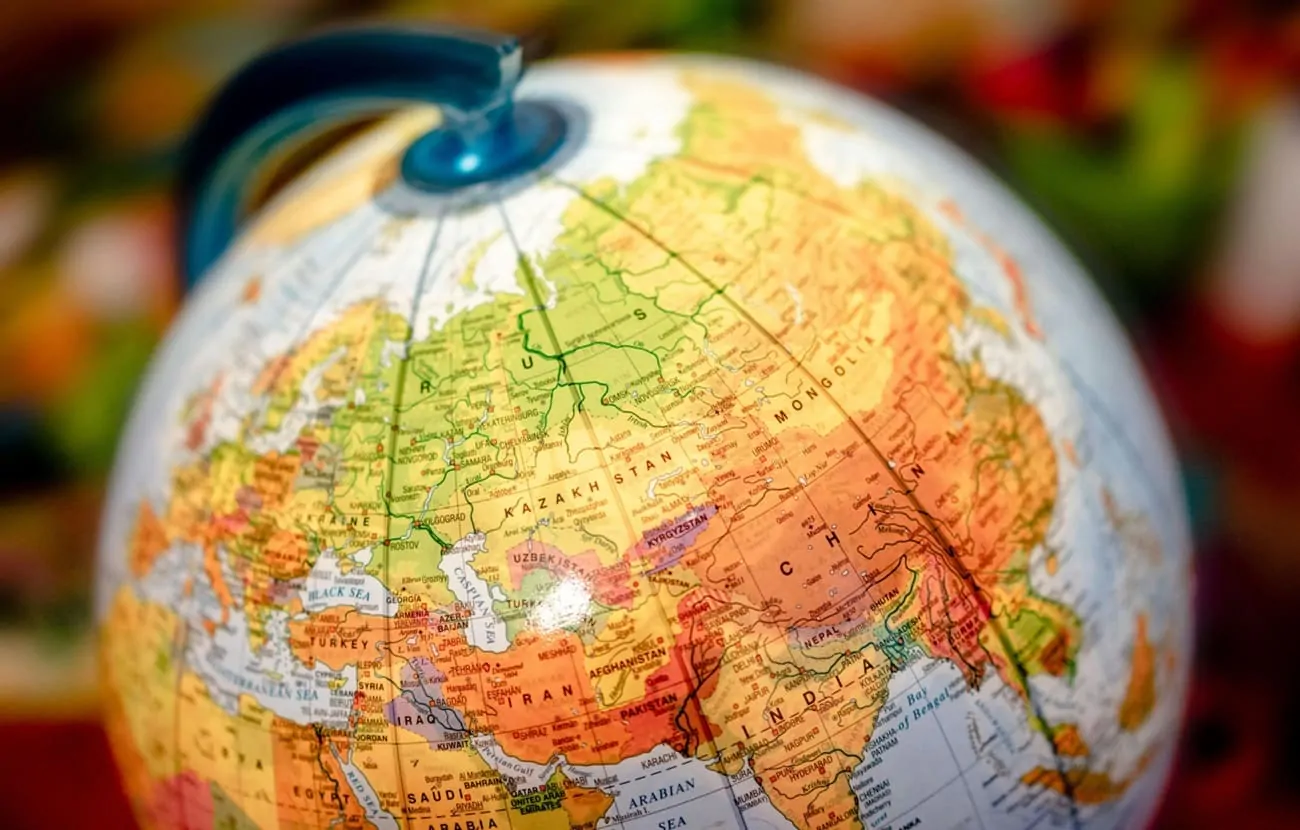


In [255]:
df_pais = df.value_counts(["Geography"])
print(f"Composición del dataset por país: ")
df_pais

Composición del dataset por país: 


,count
Geography,
France,5014
Germany,2509
Spain,2477


In [256]:
df_pais = df.value_counts(["Geography"],normalize=True)*100
df_pais

,proportion
Geography,
France,50.14
Germany,25.09
Spain,24.77


In [257]:
df_abandono = df.value_counts(["Exited"])
df_abandono

,count
Exited,
0,7963
1,2037


In [258]:
df_abandono_porpais = df[df["Exited"] == 1]
df_abandono_porpais.value_counts("Geography", normalize = True) *100

,proportion
Geography,
Germany,39.960727
France,39.764359
Spain,20.274914


In [259]:
abandono_por_pais = df.groupby(['Geography', 'Exited']).size().unstack()
abandono_por_pais['Totales'] = abandono_por_pais[1] + abandono_por_pais[0]
abandono_por_pais.rename(columns = {0: "No abandonaron", 1:"Abandonaron"}, inplace= True)
abandono_por_pais['Tasa de abandono %'] = ((abandono_por_pais["Abandonaron"] / abandono_por_pais["Totales"])*100).round(2)
total = abandono_por_pais[["Abandonaron","No abandonaron","Totales"]].sum()
abandono_por_pais.loc['Total'] = total
abandono_por_pais

<ipython-input-259-ef0fb3e06e91>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_pais = df.groupby(['Geography', 'Exited']).size().unstack()


Exited,No abandonaron,Abandonaron,Totales,Tasa de abandono %
Geography,,,,
France,4204.0,810.0,5014.0,16.15
Germany,1695.0,814.0,2509.0,32.44
Spain,2064.0,413.0,2477.0,16.67
Total,7963.0,2037.0,10000.0,NaN


<ipython-input-260-ea3c66085d1b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_pais = df.groupby(['Geography', 'Exited']).size().unstack()


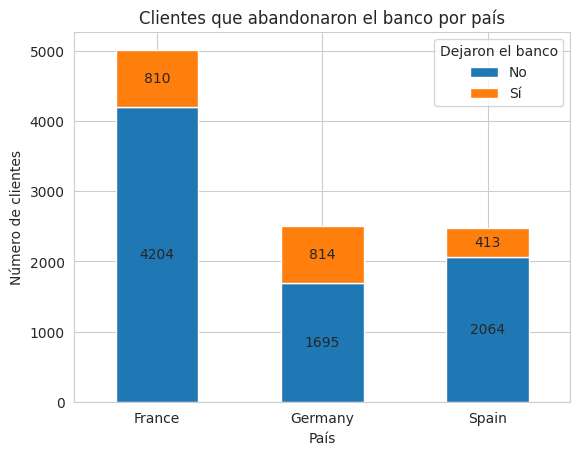

In [260]:
abandono_por_pais = df.groupby(['Geography', 'Exited']).size().unstack()
ax = abandono_por_pais.plot(kind='bar', stacked=True)
plt.title('Clientes que abandonaron el banco por país')
plt.xlabel('País')
plt.ylabel('Número de clientes')
plt.legend(title='Dejaron el banco', labels=['No', 'Sí'])
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

Se realizaron una serie de análisis que incluyó la creación de tablas y gráficos para analizar qué relación existe entre el país de residencia de cada cliente y la tasa de abandono.

Se puede observar que España es el país con menor cantidad de clientes con abandono, siendo Francia y Alemania los que tienen mayor cantidad de clientes que dejaron el banco.

Pero hay que tener presente que entre estos dos últimos, la cantidad de clientes totales en Francia duplican a la cantidad de clientes en Alemania, por lo que decir que la tasa de abandono es similar en ambos países sería incorrecto, ya que Alemania tiene la mitad de clientes que Francia e igual cantidad de abandono.

Por lo tanto la tasa alemana de abandono respecto a los clientes totales es mayor que la de los otros dos países.

---



# **ABANDONO POR GENERO:**
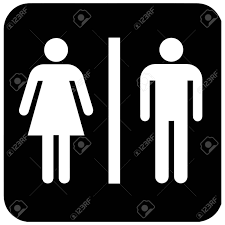
---

In [261]:
df_genero = df.value_counts(["Gender"])
print(f"Composición del dataset por genero: ")
df_genero

Composición del dataset por genero: 


,count
Gender,
Male,5457
Female,4543


In [262]:
df_genero = df.value_counts(["Gender"], normalize=True)*100
df_genero

,proportion
Gender,
Male,54.57
Female,45.43


In [263]:
df_abandono = df[df["Exited"] == 1]
df_abandono.value_counts("Gender", normalize = True) *100

,proportion
Gender,
Female,55.915562
Male,44.084438


In [264]:
abandono_por_genero = df.groupby(['Gender', 'Exited']).size().unstack()
abandono_por_genero.rename(columns = {0: "No abandonaron", 1:"Abandonaron"},inplace= True)
total = abandono_por_genero[["Abandonaron","No abandonaron"]].sum()
abandono_por_genero.loc['Total'] = total
abandono_por_genero

<ipython-input-264-2127f4dd7738>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_genero = df.groupby(['Gender', 'Exited']).size().unstack()


Exited,No abandonaron,Abandonaron
Gender,,
Female,3404,1139
Male,4559,898
Total,7963,2037


<ipython-input-265-dfd6b3052310>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_genero = df.groupby(['Gender', 'Exited']).size().unstack()


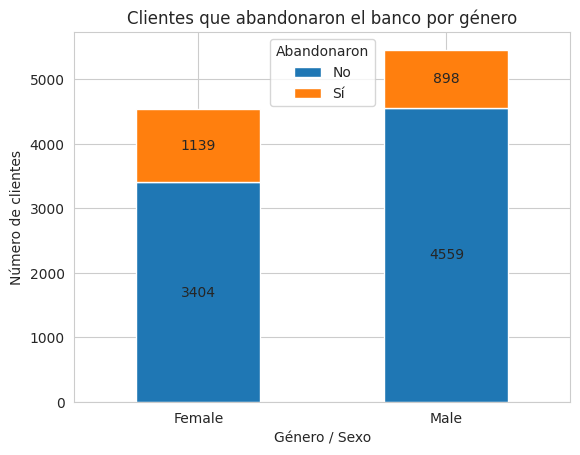

In [265]:
abandono_por_genero = df.groupby(['Gender', 'Exited']).size().unstack()
ax = abandono_por_genero.plot(kind='bar', stacked=True)
plt.title('Clientes que abandonaron el banco por género')
plt.xlabel('Género / Sexo')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.legend(title='Abandonaron', labels=['No', 'Sí'], loc='upper center')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()

In [266]:
abandono_por_genero['Totales'] = abandono_por_genero[1] + abandono_por_genero[0]
abandono_por_genero.rename(columns = {0: "No abandonaron", 1:"Abandonaron"},inplace= True)
abandono_por_genero['Tasa de abandono %'] = ((abandono_por_genero["Abandonaron"] / abandono_por_genero["Totales"])*100).round(2)
total = abandono_por_genero[["Abandonaron","No abandonaron","Totales"]].sum()
abandono_por_genero.loc['Total'] = total
abandono_por_genero

Exited,No abandonaron,Abandonaron,Totales,Tasa de abandono %
Gender,,,,
Female,3404.0,1139.0,4543.0,25.07
Male,4559.0,898.0,5457.0,16.46
Total,7963.0,2037.0,10000.0,NaN


De los datos revisados, se puede ver que la distribución por género del dataset es bastante equilibrada, siendo que el 54,5% son hombres y el 45,5% mujeres. Ahora bien, filtrando solamente por quienes abandonaron el banco, el 55,9 son mujeres y el 44,1 restante son hombres (se invierte la tendencia del dataset completo).

Tanto en el gráfico como en la última tabla, se puede observar que la tasa de abandono de mujeres es mayor a la de los hombres, entiendendose dicha tasa como la proporción entre la cantidad de abandonos por género dividido los clientes totales por género.

---



# **RELACIÓN ENTRE VARIABLES Y VARIABLE TARGET U OBJETIVO**

---



In [267]:
variables_categoricas = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']
variables_continuas =  ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

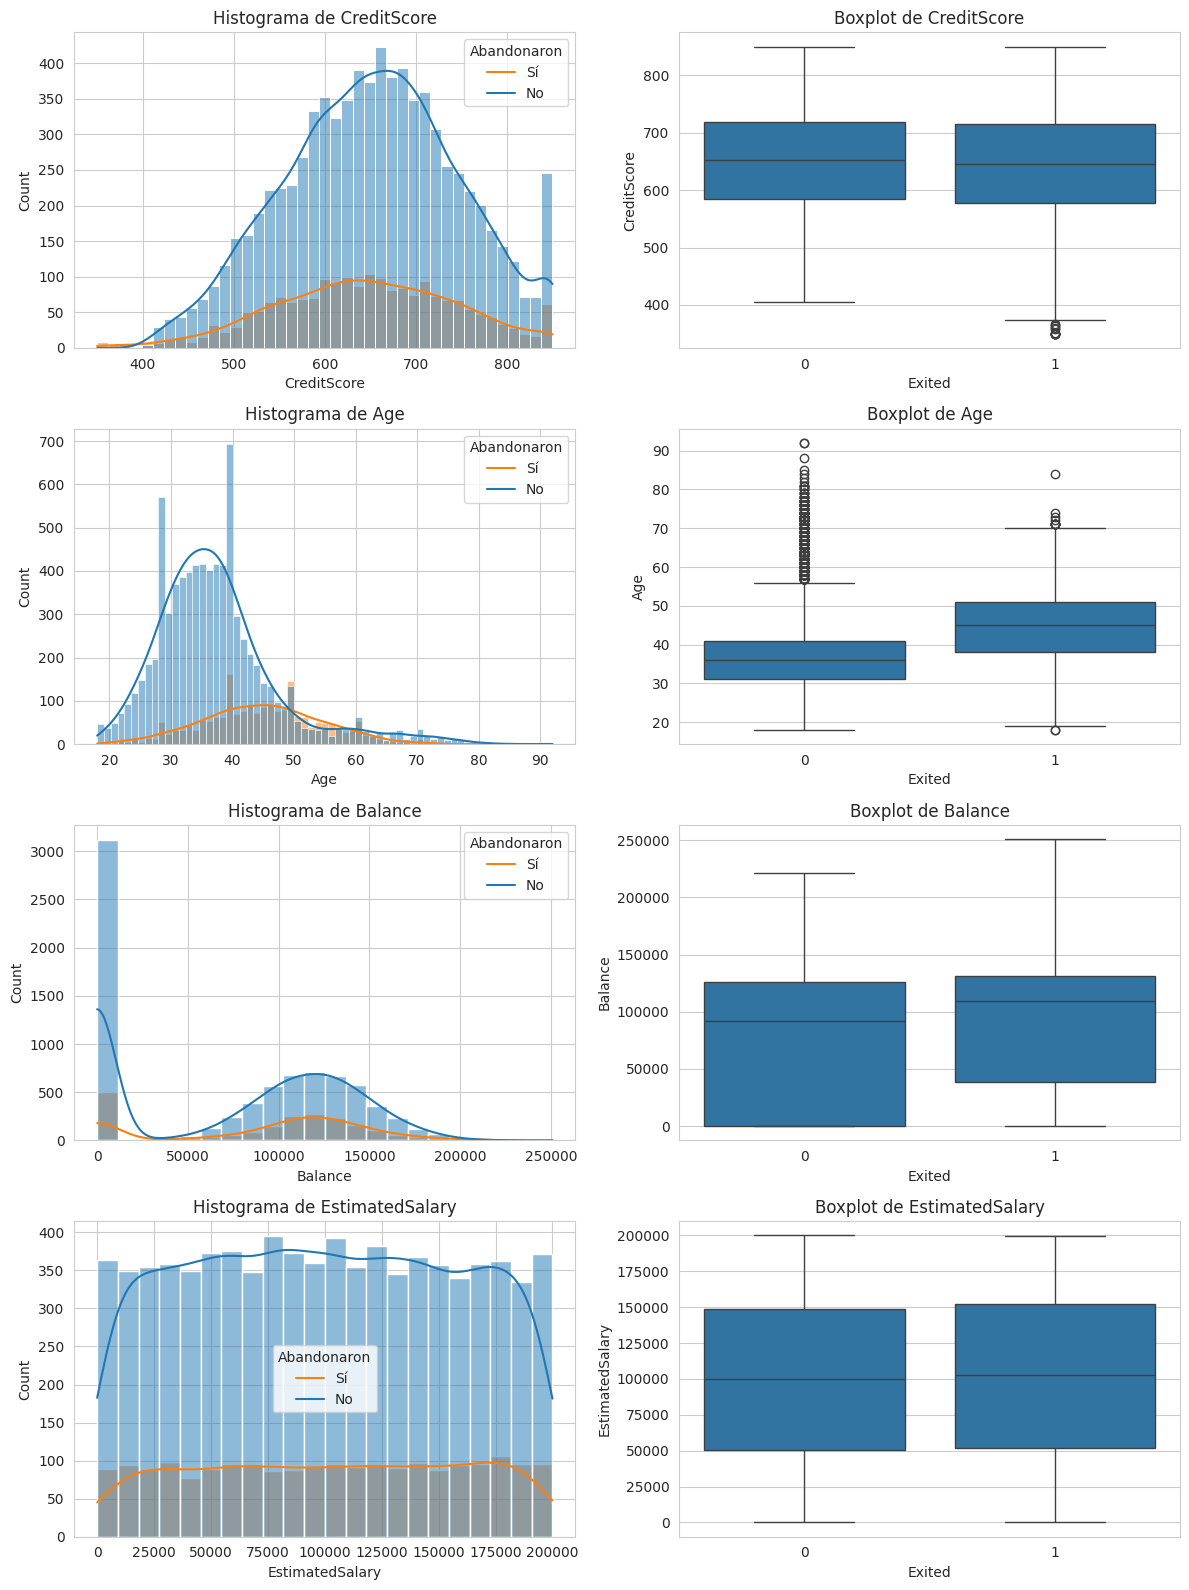

In [268]:
fig, axes = plt.subplots(len(variables_continuas), 2, figsize=(12, len(variables_continuas) * 4))

for i, var in enumerate(variables_continuas):
    sns.histplot(data=df, x=var, hue='Exited', ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histograma de {var}')
    axes[i, 0].legend(title='Abandonaron', labels=['Sí', 'No'])


    sns.boxplot(data=df, x='Exited', y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {var}')

plt.tight_layout()

plt.show()

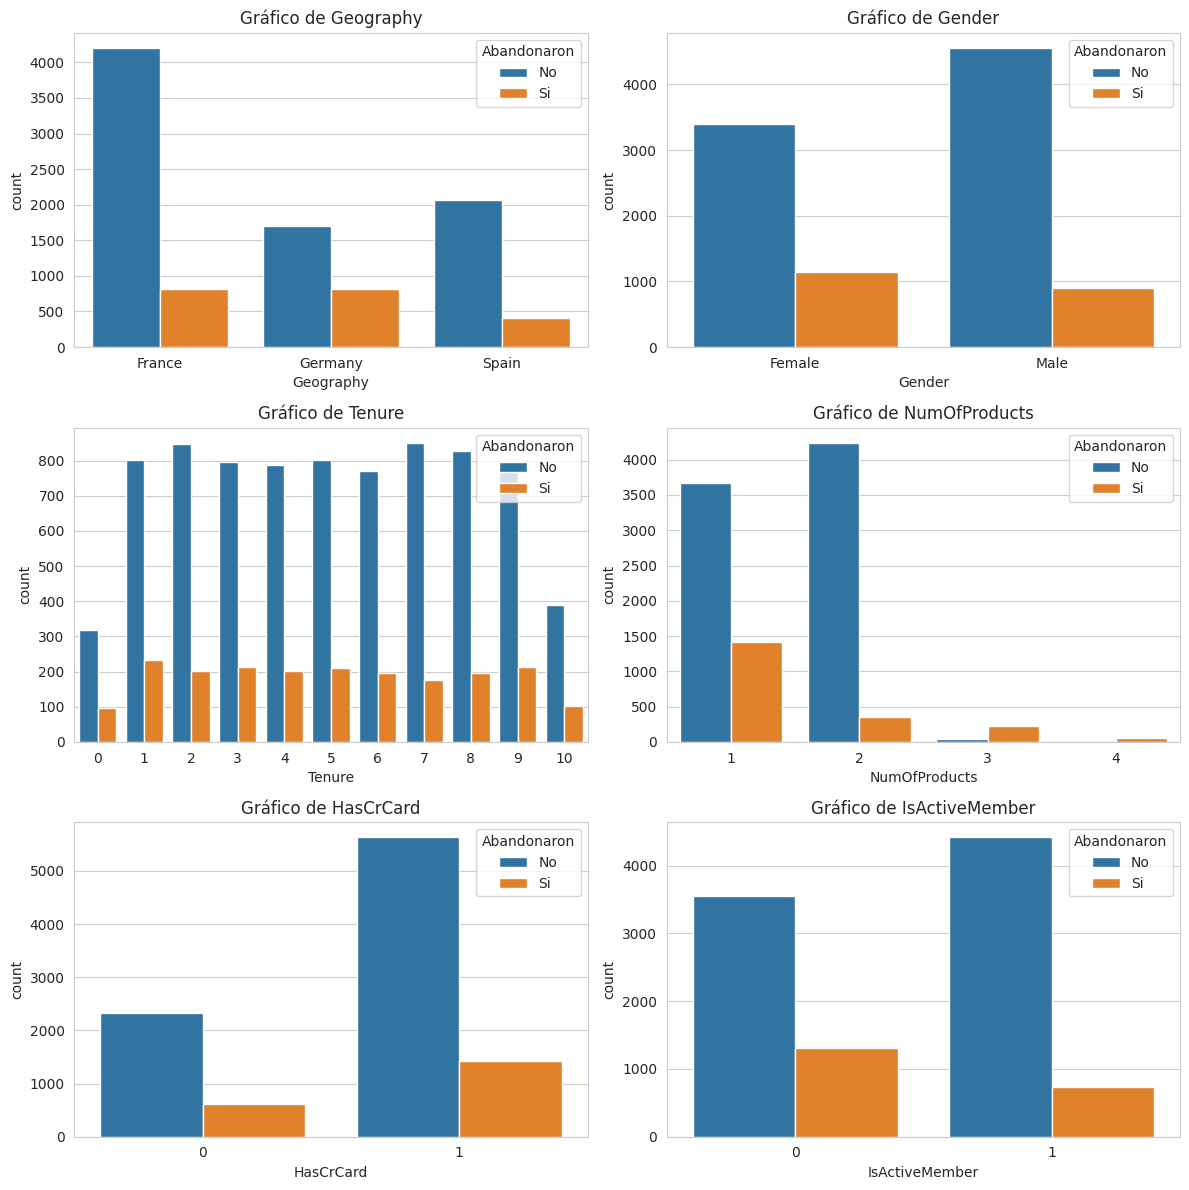

In [269]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, var in enumerate(variables_categoricas):
    row, col = divmod(i, 2)
    sns.countplot(data=df, x=var, hue='Exited', ax=axes[row, col])
    axes[row, col].set_title(f'Gráfico de {var}')
    axes[row, col].legend(title='Abandonaron', labels=['No', 'Si'])



plt.tight_layout()

plt.show()

CONCLUSIONES:

CreditScore: la distribución del credit score pareciera tener una distribución normal, concentrandose la mayoría de casos alrededor de la media.

Age: la distribución indica preponderancia de gente menor a 50 años, concentrándose el abandono en clientes de entre 40 y 60 años.

Tenure: la distribución de la antiguedad está básicamente aplanada, es decir, la antiguedad de 0 a 10 años está balanceada a lo largo del dataset.

Balance: se puede observar una predominancia de clientes con saldos en sus cuentas bancarias por debajo de los 50.000 euros, y por consiguiente, son los que revisen mayor índice de abandono. Podría decirse como contrapunto, que los clientes con saldos en cuantas bancarias en los rangos más altos, tienen mayor probabilidad de quedarse en el banco.

NumOfProducts: el dataset muestra una preponderancia de clientes con 1 o 2 productos, siendo casi nulo aquellos clientes con 3 o más. Pero proporcionalmente, en clientes con 3 o más productos, hay un mayor abandono (no en términos nominales)

HasCrCard: se puede inferir que aquellos clientes con tarjetas de crédito tienen mayor probabilidad de abandonar el banco.

IsActiveMember: se puede inferir que aquellos clientes no activos tienen mayor probabilidad de abandonar el banco.

EstimatedSalary: la distribución de clientes en base al salario estimado es una distribución sumamente pareja. Si bien el salario anual estimado va desde el 0.00 a 200.000 euros, la cantidad de clientes en cada segmento es constante en todo el dataset. A su vez, el abandono teniendo en cuenta está variable pareciera ser constante, por lo que no tendría una relevancia significativa en la variable target u objetivo.

Geography: se puede observar que España es el país con menor cantidad de clientes con abandono, siendo Francia y Alemania los que tienen mayor cantidad de clientes que dejaron el banco.
Pero hay que tener presente que entre estos dos últimos, la cantidad de clientes totales en Francia duplican a la cantidad de clientes en Alemania, por lo que decir que la tasa de abandono es similar en ambos países sería incorrecto, ya que Alemania tiene la mitad de clientes que Francia e igual cantidad de abandono.
Por lo tanto la tasa alemana de abandono respecto a los clientes totales es mayor que la de los otros dos países.

Gender: de los datos revisados, se puede ver que la distribución por género del dataset es bastante equilibrada, siendo que el 54,5% son hombres y el 45,5% mujeres. Ahora bien, filtrando solamente por quienes abandonaron el banco, el 55,9 son mujeres y el 44,1 restante son hombres (se invierte la tendencia del dataset completo).
Se puede observar que la tasa de abandono de mujeres es mayor a la de los hombres, entiendendose dicha tasa como la proporción entre la cantidad de abandonos por género dividido los clientes totales por género.

---



# **ANÁLISIS DE VALORES ATÍPICOS (OUTLIERS):**

---



Surge del análisis gráfico realizado arriba mediante los boxplots que las variables "AGE" y "CREDITSCORE" presentan algunos valores atípicos. La intención del presente apartado será identificar si aquellos valores atípicos deben considerarse datos inválidos (por lo tanto, no ser considerados dentro del dataset) o si los mismos, tomando en cuenta el contexto del dataset en general, deben ser considerados válidos.

AGE

In [270]:
df_age = df["Age" ]
q1 = np.percentile(df_age,25)
q3 = np.percentile(df_age,75)
iqr = q3 - q1
q1


32.0

In [271]:
iqr

12.0

In [272]:
limite_inferior = q1 - 1.5 *iqr
limite_superior = q3 + 1.5 *iqr

In [273]:
atipicos = df_age[(df_age < limite_inferior) | (df_age > limite_superior)]
atipicos.sort_values(ascending=True)


,Age
769,63
8562,63
2053,63
2078,63
6410,63
...,...
3531,84
3033,85
2458,88
6443,92


CREDITSCORE

In [274]:
df_credit = df["CreditScore" ]
q1 = np.percentile(df_credit,25)
q3 = np.percentile(df_credit,75)
iqr = q3 - q1

In [275]:
limite_inferior = q1 - 1.5 *iqr
limite_superior = q3 + 1.5 *iqr

In [276]:
atipicos_credit = df_credit[(df_credit < limite_inferior) | (df_credit > limite_superior)]
atipicos_credit.sort_values(ascending=True)

,CreditScore
1631,350
1838,350
8723,350
8762,350
9624,350
2473,351
1962,358
1405,359
1193,363
2579,365


Del análisis de valores atípicos, puede inferirse que los mismos responden a las características propias del dataset, pero no son valores que deban eliminarse del mismo.

En el caso de la variable edad, hay una gran cantidad de clientes de edad superior a los 63 años, pero no se detectaron valores absurdos, como podría ser edades superiores a los 100 años (por su poca frecuencia dada la expectativa de vida del ser humano) o inferiores a los 16/18 años (edades mínima permitida para poder abrir una cuenta bancaria).

En el caso de la variable CreditScore tampoco amerita eliminar los valores atípicos ya que no implican valores absurdos y están alineados con el rango de valores establecido por el banco.

---



# **MATRIZ DE CORRELACIÓN:**

Se analizará de forma gráfica mediante un mapa de calor si existe una relación medianamente fuerte entre las distintas varibles del dataset.

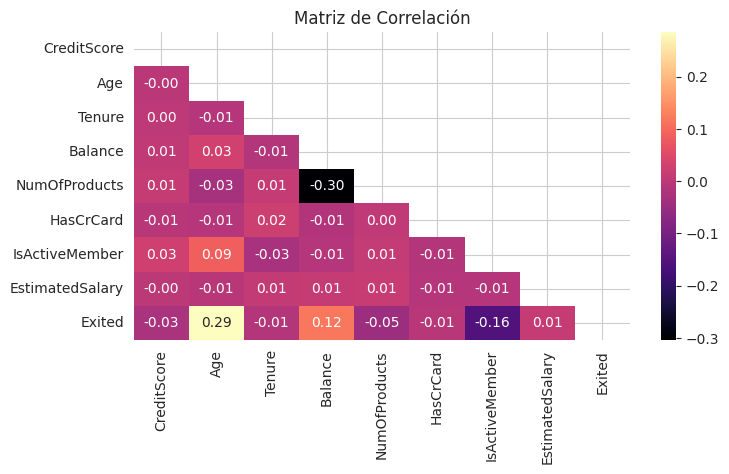

In [277]:
variables_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

correlation_matrix = df[variables_numericas].corr()
sns.set_style("whitegrid")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", mask=mask)
plt.title("Matriz de Correlación")
plt.show()



---



CONCLUSIONES:

AGE - EXITED: hay una correlación algo débil entre la edad de los clientes y su probabilidad de abandono, indicando una mayor probabilidad de abandono en clientes de edades más avanzadas (por encima de los 40 años)  (0,29)

BALANCE - NumOfProducts : existe una leve correlación negativa entre estas dos variables, indicando que a mayor cantidad de productos del cliente, tiene un menor saldo en la cuenta bancaria. (-0,30)

IsActiveMember -EXITED: hay una muy leve correlación negativa, indicando que los miembros activos son los menos propensos a abandonar el banco. (-0,16)

BALANCE - EXITED: una muy mínima correlación positiva, indicando que a mayor saldo en la cuenta bancaria, mayor probabilidad de abandono.

---



# **CREACIÓN DE ATRIBUTOS (FEATURE ENGINEERING)**

Tomando las dos variables que responden a valores de índole monetaria, primero ordenaremos cada una de ellas para poder visualizar mínimos y máximos para luego poder ordenarlas por rangos. Para los rangos de "EstimatedSalary" y "Balance" se crearán dos nuevas variables categóricas.

In [278]:
df.sort_values("EstimatedSalary", ascending=True).head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
9647,625,France,Male,31,5,0.00,2,0,1,90.07,0
9010,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1
5548,710,France,Male,38,2,0.00,2,1,0,96.27,0
4989,629,France,Male,40,9,0.00,1,1,0,106.67,0
7565,708,France,Male,52,10,105355.81,1,1,0,123.07,1
2498,718,France,Male,37,8,0.00,2,1,1,142.81,0
8722,621,France,Male,35,7,87619.29,1,1,0,143.34,0
4774,811,France,Female,35,7,0.00,1,1,1,178.19,0
1451,551,France,Female,38,10,0.00,2,1,1,216.27,0


In [279]:
df.sort_values("EstimatedSalary", ascending=False).head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6646,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
3580,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
9096,569,France,Male,37,9,178755.84,1,1,0,199929.17,0
8926,620,France,Male,28,8,0.00,2,1,1,199909.32,0
5958,540,France,Female,40,3,165298.12,1,0,1,199862.75,0
1378,715,Spain,Female,35,4,40169.88,2,1,1,199857.47,0
6402,719,France,Male,36,3,155423.17,1,1,1,199841.32,0
8088,541,Germany,Female,39,9,100116.67,1,1,1,199808.10,1
6125,501,Germany,Female,34,7,93244.42,1,0,1,199805.63,0


In [280]:
df.sort_values("Balance", ascending=True).head(10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
5148,731,Spain,Male,70,3,0.0,2,1,1,141180.66,0
5143,646,Spain,Male,31,2,0.0,1,1,1,170821.43,1
5142,719,Spain,Female,48,5,0.0,2,0,0,78563.66,0
5141,774,Spain,Male,32,9,0.0,2,1,0,10604.48,0
5139,700,Spain,Male,47,4,0.0,1,1,0,121798.52,1
5138,850,France,Male,34,6,0.0,1,0,1,52796.31,0
5135,518,France,Male,40,4,0.0,2,0,1,194416.58,0
5152,585,Spain,Male,36,10,0.0,2,1,1,180318.60,0
5132,439,France,Female,66,9,0.0,1,1,0,65535.56,0


In [281]:
df.sort_values("Balance", ascending=False).head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2092,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
8733,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
3588,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
6717,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
1067,650,Germany,Male,26,4,214346.96,2,1,0,128815.33,0
138,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1
1533,850,France,Female,37,3,212778.20,1,0,1,69372.88,0
3920,634,Germany,Male,43,3,212696.32,1,1,0,115268.86,0
2709,592,France,Male,37,4,212692.97,1,0,0,176395.02,0


In [282]:
cortes_rango = [0, 49999.99, 99999.99, 149999.99, 199999.99 ]
rangos_salary = [1, 2, 3, 4]

df["RangoSalary"] = pd.cut(df["EstimatedSalary"], bins=cortes_rango, labels=rangos_salary)
df["RangoSalary"].value_counts()

,count
RangoSalary,
3,2555
2,2537
4,2455
1,2453


In [283]:
cortes_saldo = [0.00, 24999.99, 49999.99, 74999.99, 99999.99, 124999.99, 149999.99, 174999.99, 199999.99, 224999.99, 249999.99,274999.99]
rango_balance = [1, 2, 3,
                       4, 5, 6,
                       7, 8,
                       9, 10, 11]
df["RangoBalance"] = pd.cut(df["Balance"], bins= cortes_saldo, labels=rango_balance)
df["RangoBalance"].value_counts()

,count
RangoBalance,
5,2068
6,1762
4,1160
7,738
3,349
8,197
2,69
9,32
1,6


In [284]:
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,RangoSalary,RangoBalance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3,NaN
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,4
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,7
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2,NaN
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,2,NaN
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,3,3
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,NaN
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,4


In [285]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [286]:
balance_cero = df[df["Balance"] == 0.00]
balance_cero

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,RangoSalary,RangoBalance
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,3,NaN
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0,2,NaN
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0,1,NaN
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,2,NaN
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0,4,NaN
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0,4,NaN
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0,4,NaN
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0,2,NaN


In [287]:
df["RangoBalance"].fillna(1, inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,RangoSalary,RangoBalance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,4
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,7
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,2,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,3,3
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,4


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  RangoSalary      10000 non-null  category
 12  RangoBalance     10000 non-null  category
dtypes: category(4), float64(2), int64(7)
memory usage: 743.1 KB


In [289]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [290]:
df["RangoSalary"].value_counts()


,count
RangoSalary,
3,2555
2,2537
4,2455
1,2453


In [291]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [292]:
df = df.astype({"RangoSalary":"int","RangoBalance":"int" })
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,RangoSalary,RangoBalance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,2.50120,3.741100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,1.10983,2.288273
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.00000,1.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.00000,1.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.00000,4.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,3.00000,6.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,4.00000,11.000000




---



# **COEFICIENTE DE VARIACIÓN PARA LA VARIABLE ESTIMATED SALARY**





In [293]:
import scipy.stats as stats
stats.describe(df.EstimatedSalary)

DescribeResult(nobs=10000, minmax=(11.58, 199992.48), mean=100090.239881, variance=3307456784.134512, skewness=0.0020850448448748848, kurtosis=-1.181527710874237)

In [294]:
disp_standard = np.std(df.EstimatedSalary)
varianza = np.var(df.EstimatedSalary)
print(f"Desviación estandar: {disp_standard}")
print(f"Varianza: {varianza}")


Desviación estandar: 57507.617221165565
Varianza: 3307126038.4560986


In [295]:
coeficiente_variacion = round((disp_standard / np.mean(df.EstimatedSalary))*100,2)
print(f"Coeficiente de variación = {coeficiente_variacion}")

Coeficiente de variación = 57.46


Al ubicarse el coeficiente de variación en un 57,46% indica que la media de la variable "EstimatedSalary" no es representativa.

---



# **COEFICIENTE DE VARIACIÓN PARA LA VARIABLE BALANCE**

In [296]:
disp_standard = np.std(df.Balance)
varianza = np.var(df.Balance)
print(f"Desviación estandar: {disp_standard}")
print(f"Varianza: {varianza}")
coeficiente_variacion = round((disp_standard / np.mean(df.Balance))*100,2)
print(f"Coeficiente de variación = {coeficiente_variacion}")

Desviación estandar: 62394.285254125185
Varianza: 3893046832.373143
Coeficiente de variación = 81.58


Al ubicarse el coeficiente de variación en un 81,58% indica que la media de la variable "Balance" no es representativa.



---



# **MACHINE LEARNING**

Luego del análisis exploratorio de datos y la ingenieria de atributos, se comienza a trabajar con el entrenamiento de módelos de machine learning.
Por las características del dataset con el que se está trabajando y además, por la clase de problema a resolver, se probarán distintos algoritmos de clasificación y se trabajará sobre la optimización de los mismos.
De todos modos, sobre el final del trabajo, también se han realizado pruebas con un algoritmo de regresión para ejemplificar las limitaciones que tiene aplicar una solución de regresión a un problema de regresión.

Los 3 módelos de clasifiación elegidos son:

- Árbol de decisión
- Random Forest
- XGBOOST

Es importante destacar que dadas las características de desbalanceo que tiene el dataset en cuanto a la variable objetivo, la metrica sobre la cual nos concentraremos a la hora de decidir qué módelo tiene un mejor rendimiento será "f1_score", ya que combina la precisión y el recall en una sola métrica, proporcionando un equilibrio entre ambas, penzalizando de esta forma los falsos positivos y los falsos negativos de manera equilibrada.

# **ALGORITMOS DE CLASIFICACIÓN**

**ÁRBOL DE DECISIÓN**

In [297]:
pip install mlxtend --upgrade --no-deps

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

In [299]:
df['Geography'].replace({'Spain':0, 'France':1, 'Germany':2}, inplace=True)
df['Gender'].replace({'Female':0, 'Male':1}, inplace=True)
X = df.drop(columns=['Exited', "Gender", "EstimatedSalary", "HasCrCard", "Balance"])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y) #Divido los datos del dataset para entrenar (elegí proporción 75% - 25%)

modelo = DecisionTreeClassifier()

modelo = DecisionTreeClassifier()  #creo el módelo
modelo.fit(X_train, y_train) #entreno el módelo

preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)

In [300]:
importances = modelo.feature_importances_
nombres_variables = X_train.columns
importances_df = pd.DataFrame({"Variable:": nombres_variables, "Importancia": importances})
importances_df = importances_df.sort_values("Importancia", ascending=False)
importances_df

,Variable:,Importancia
0,CreditScore,0.262953
2,Age,0.262105
4,NumOfProducts,0.117331
3,Tenure,0.101257
7,RangoBalance,0.092436
6,RangoSalary,0.066608
5,IsActiveMember,0.058080
1,Geography,0.039230


In [301]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [302]:
y.value_counts(normalize=True).round(5)*100

,proportion
Exited,
0,79.63
1,20.37


In [303]:
cm = confusion_matrix(y_train, preds_train)  #matriz de confusión con los datos de entrenamiento, como control.
cm
#La matriz de confusión generada a partir de los datos de entrenamiento solo arroja verdaderos positivos y verdaderos negativos, ya que aún el módelo no fue puesto a prueba, solo entrenado.

array([[5972,    0],
       [   0, 1528]])

In [304]:
preds_train = modelo.predict(X_train)
f1_abandono = metrics.f1_score(y_train, preds_train, pos_label=1)
f1_no_abandono = metrics.f1_score(y_train, preds_train, pos_label=0)
f1_abandono, f1_no_abandono                #calculo las métricas con el dataset de entrenamiento

(1.0, 1.0)

In [305]:
cm = confusion_matrix(y_test, preds)       #matriz de confusión con los datos de testeo.
cm

array([[1716,  275],
       [ 245,  264]])

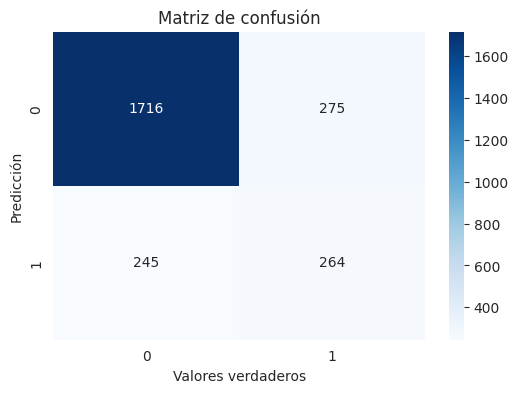

In [306]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Valores verdaderos")
plt.ylabel("Predicción")
plt.show()
#Clase 1: Abandono
#Clase 0: No abandono

In [307]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.792

El accuracy o exactitud está mostrando un 81% aproximadamente de predicciones correctas, pero con este dataset no es una metrica del todo confiable, dado el desbalanceo que tiene (80% de clientes que no abandonaron el banco vs un 20% que si)

In [308]:
precision_abandono = metrics.precision_score(y_test, preds, pos_label=1)
precision_no_abandono = metrics.precision_score(y_test, preds, pos_label=0)
precision_abandono, precision_no_abandono

(0.4897959183673469, 0.8750637429882713)

In [309]:
recall_abandono = metrics.recall_score(y_test, preds, pos_label=1)
recall_no_abandono = metrics.recall_score(y_test, preds, pos_label=0)
recall_abandono, recall_no_abandono

(0.518664047151277, 0.861878453038674)

Para el caso de las métricas de precisión y sensibilidad (recall) se puede observar que el desbalanceo que tiene el dataset afecta a dichas métricas. Al tener el dataset mayoría de casos con clientes que no abandonaron el banco, tanto la precision como el recall del grupo de "no abandono" es mucho más alto que los mismos indices para el grupo de "abandono".

In [310]:
f1_abandono = metrics.f1_score(y_test, preds, pos_label=1)
f1_no_abandono = metrics.f1_score(y_test, preds, pos_label=0)
f1_abandono, f1_no_abandono

(0.5038167938931297, 0.868421052631579)

In [311]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      1528

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [312]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1991
           1       0.49      0.52      0.50       509

    accuracy                           0.79      2500
   macro avg       0.68      0.69      0.69      2500
weighted avg       0.80      0.79      0.79      2500



En base al entrenamiento y los datos obtenidos a través de las métricas, puede observarse un overfitting (sobreajuste) del módelo, es decir, está procesando "demasiado bien" los datos de entrenamiento, pero esto genera una rigidez en el módelo al ingresar datos nuevos.

Una posible causa del overfitting puede ser la profundidad de las ramas del árbol. En el ejemplo en cuestión no estamos determinando un máximo de ramas, por lo cual el módelo está profundizando demasiado el análisis.

Por tal motivo, a continuación se utilizará el método GridSearch CV para buscar cual es la combinación óptima de hiperparámetros.

In [313]:
from sklearn.model_selection import GridSearchCV

X = df.drop(columns=['Exited', "Gender", "EstimatedSalary", "HasCrCard", "Balance"])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)
modelo = DecisionTreeClassifier()



In [314]:
parametros_grid = {"max_depth" : [5, 6, 7, 8, 9], "min_samples_leaf": [2,4,6]}
modeloDT = GridSearchCV(modelo, parametros_grid, cv=5, scoring = "f1")  #seteo el scoring en f1-score por trabajar con clases desbalanceadas
modeloDT.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 4, 6]},
             scoring='f1')

In [315]:
%%time
modeloDT.fit(X_train, y_train)

CPU times: user 2.41 s, sys: 11.8 ms, total: 2.42 s
Wall time: 3.07 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 4, 6]},
             scoring='f1')

In [316]:
modeloDT.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'param_grid': {'max_depth': [5, 6, 7, 8, 9], 'min_samples_leaf': [2, 4, 6]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'f1',
 'verbose': 0}

In [362]:
print("Mejores parámetros: "+str(modeloDT.best_params_))
print("Mejor score: "+str(modeloDT.best_score_))

Mejores parámetros: {'max_depth': 8, 'min_samples_leaf': 6}
Mejor score: 0.5555010762849937


In [363]:
modelo = DecisionTreeClassifier(max_depth=8, min_samples_leaf=6)  #limito la profundidad
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)

In [364]:
preds_train = modelo.predict(X_train)
f1_abandono = metrics.f1_score(y_train, preds_train, pos_label=1)
f1_no_abandono = metrics.f1_score(y_train, preds_train, pos_label=0)
f1_abandono, f1_no_abandono

#calculo las métricas con el dataset de entrenamiento, y en este caso, a diferencia de lo anterior, el f1.score se ve notablemente reducido (sobretodo para el abandono),
#como consecuencia de entrenar a los datos con una menos profundidad en el árbol

(0.6217287866772403, 0.9235454399743549)

In [365]:
cm = confusion_matrix(y_test, preds)
cm

array([[1910,   93],
       [ 263,  234]])

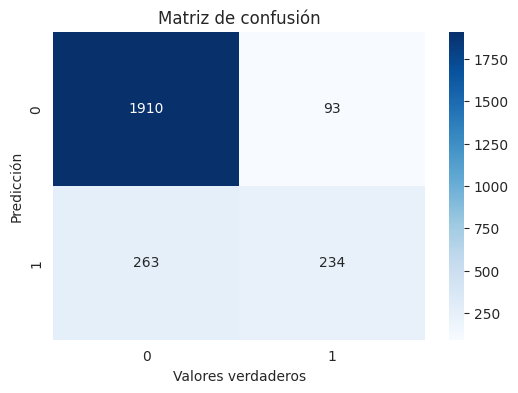

In [366]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Valores verdaderos")
plt.ylabel("Predicción")
plt.show()
#Clase 1: Abandono
#Clase 0: No abandono

In [322]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.8672

In [323]:
precision_abandono = metrics.precision_score(y_test, preds, pos_label=1)
precision_no_abandono = metrics.precision_score(y_test, preds, pos_label=0)
precision_abandono, precision_no_abandono

(0.7959866220735786, 0.8768741481144934)

In [324]:
recall_abandono = metrics.recall_score(y_test, preds, pos_label=1)
recall_no_abandono = metrics.recall_score(y_test, preds, pos_label=0)
recall_abandono, recall_no_abandono

(0.4675834970530452, 0.9693621295831241)

In [325]:
f1_abandono = metrics.f1_score(y_test, preds, pos_label=1)
f1_no_abandono = metrics.f1_score(y_test, preds, pos_label=0)
f1_abandono, f1_no_abandono

(0.5891089108910892, 0.9208015267175572)

In [367]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5960
           1       0.80      0.51      0.62      1540

    accuracy                           0.87      7500
   macro avg       0.84      0.74      0.77      7500
weighted avg       0.87      0.87      0.86      7500



In [368]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2003
           1       0.72      0.47      0.57       497

    accuracy                           0.86      2500
   macro avg       0.80      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500



CONCLUSIÓN: en base al trabajo realizado, puede observarse que el módelo mejoró notablemente al reducir la profundidad del árbol en el análisis, y de esta
forma, reduciendo el overfitting que habíamos visto en el primer entrenamiento. El análisis realizado debe contemplarse también considerando lo desbalanceado que estaba el dataset en cuanto a los clientes que abandonaron y no abandonaron el banco, por eso el algortimo tiene cierta debilidad al momento de realizar la predicción. De todas formas, es un primer paso importante para que el Banco pueda comenzar a dirigir políticas de retención y fidelización a aquellos clientes que tengan probabilidad por sus características de dejar el banco. Se recomienda continuar incorporando datos al dataset y continuar con el entrenamiento del modelo con los nuevos datos, para que de esta forma continue con el aprendizaje en base a información mucha más diversificada.


A continuación, se probarán distintas técnicas para intentar reducir el efecto del desbalanceo que presenta el dataset en la variable target:

In [369]:
from imblearn.over_sampling import SMOTE

In [329]:
smote = SMOTE(k_neighbors=5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [330]:
valores_smote = np.asarray(np.unique(y_train_smote, return_counts=True))
valores_smote

array([[   0,    1],
       [5972, 5972]])

In [331]:
classifier = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, class_weight="balanced")
modelo_balanceado = classifier.fit(X_train_smote, y_train_smote)

y_pred_SMOTE = modelo_balanceado.predict(X_test)

print(classification_report(y_test, y_pred_SMOTE))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1991
           1       0.48      0.70      0.57       509

    accuracy                           0.78      2500
   macro avg       0.69      0.75      0.71      2500
weighted avg       0.82      0.78      0.80      2500



In [332]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [333]:
valores_ros = np.asarray(np.unique(y_train_ros, return_counts=True))
valores_ros

array([[   0,    1],
       [5972, 5972]])

In [334]:
classifier = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, class_weight="balanced")
modelo_ros = classifier.fit(X_train_ros, y_train_ros)

y_pred_ros = modelo_ros.predict(X_test)

print(classification_report(y_test, y_pred_ros))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1991
           1       0.46      0.77      0.58       509

    accuracy                           0.77      2500
   macro avg       0.69      0.77      0.71      2500
weighted avg       0.83      0.77      0.79      2500



In [335]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)

In [336]:
classifier = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, class_weight="balanced")
modelo_smotetomek = classifier.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = modelo_smotetomek.predict(X_test)

print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1991
           1       0.47      0.66      0.55       509

    accuracy                           0.78      2500
   macro avg       0.69      0.74      0.70      2500
weighted avg       0.82      0.78      0.79      2500



CONCLUSIÓN: aplicando técnicas de SMOTE, RandomOverSample y SMOTETomek no se aprecian mejoras en el módelo de predicción. Particularmente, la variable menos dominante no muestra señales de mejoras en la predicción, y adicionalmente, se ven castigadas las predicciones sobre la variable predominante.

---



**RANDOM FOREST**





In [392]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Exited', "Gender", "EstimatedSalary", "HasCrCard", "Balance"])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

modelo_clf = RandomForestClassifier(max_depth=8, n_estimators= 50)

modelo_clf.fit(X_train, y_train)
preds = modelo_clf.predict(X_train)

In [393]:
print(classification_report(y_true=y_train, y_pred =preds))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      5972
           1       0.88      0.45      0.59      1528

    accuracy                           0.88      7500
   macro avg       0.88      0.72      0.76      7500
weighted avg       0.88      0.88      0.86      7500



In [394]:
print(metrics.classification_report(y_test, modelo_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1991
           1       0.84      0.45      0.58       509

    accuracy                           0.87      2500
   macro avg       0.86      0.71      0.75      2500
weighted avg       0.87      0.87      0.85      2500



Optimizaremos el módelo de Random Forest utilizando el método Random Search.

In [395]:
from sklearn.model_selection import RandomizedSearchCV
parametros_random = {"n_estimators" : [100, 125, 150],
    "max_depth" : [5, 6, 7, 8, 9],
    "min_samples_leaf": [2,4,6],
    "min_samples_split": [2,4,6],
    "bootstrap": [True, False]}


modeloRF = RandomizedSearchCV(modelo_clf, parametros_random, cv=5, scoring = "f1", verbose = 2)  #seteo el scoring en f1-score por trabajar con clases desbalanceadas


In [396]:
%%time
modeloRF.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=8,
                                                    n_estimators=50),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 125, 150]},
                   scoring='f1', verbose=2)

In [397]:
print("Mejores parametros: "+str(modeloRF.best_params_))
print("Mejor Score: "+str(modeloRF.best_score_)+'\n')

Mejores parametros: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_depth': 9, 'bootstrap': True}
Mejor Score: 0.5379467222322916



In [398]:
modelo_clf = RandomForestClassifier(max_depth=9, n_estimators= 100, min_samples_leaf=6, min_samples_split=4, bootstrap= True, random_state=42)

modelo_clf.fit(X_train, y_train)
preds = modelo_clf.predict(X_train)

In [399]:
print(classification_report(y_true=y_train, y_pred =preds))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      5972
           1       0.85      0.46      0.59      1528

    accuracy                           0.87      7500
   macro avg       0.86      0.72      0.76      7500
weighted avg       0.87      0.87      0.86      7500



In [400]:
print(metrics.classification_report(y_test, modelo_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1991
           1       0.80      0.46      0.58       509

    accuracy                           0.87      2500
   macro avg       0.84      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500





---



**XGBOOST**

In [401]:
!pip install xgboost

In [402]:
import xgboost as xgb
from sklearn.metrics import f1_score

In [403]:
param_grid = {'n_estimators': [100, 125, 150],
    "max_depth" : [5, 6, 7, 8, 9],
    "min_samples_leaf": [2,4,6],
    "min_samples_split": [2,4,6],
    'gamma':np.arange(0.1,0.8,0.2),
    'alpha':np.arange(0.1,0.8,0.2),'enable_categorical': [True]}

clf_xgb = xgb.XGBClassifier()

clf_xgb_cv = RandomizedSearchCV(clf_xgb, param_grid, cv=5, scoring = "f1", n_jobs=-1, verbose = 2)
clf_xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:22:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.3, 0.5, 0.7]),
                                        'enable_categorical': [True],
                                        'gamma': array([0.1, 0.3, 0.5, 0.7]),
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 125, 150]},
                   scoring='f1', verbose=2)

In [404]:
y_train_pred = clf_xgb_cv.predict(X_train)
y_test_pred = clf_xgb_cv.predict(X_test)

f1score_XGBoost = f1_score(y_test, y_test_pred)
print('XGBoost Model F1 score: {0:0.3f}'.format(f1score_XGBoost ))

XGBoost Model F1 score: 0.592


In [405]:
print(classification_report(y_true=y_test, y_pred =y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.76      0.48      0.59       509

    accuracy                           0.86      2500
   macro avg       0.82      0.72      0.76      2500
weighted avg       0.86      0.86      0.85      2500



In [406]:
print(metrics.classification_report(y_test, modelo_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1991
           1       0.80      0.46      0.58       509

    accuracy                           0.87      2500
   macro avg       0.84      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



CONCLUSIÓN GENERAL DE LOS 3 MÉTODOS DE CLASIFICACIÓN

Luego de analizar el trabajo realizado y los resultados obtenidos, es claro que al trabajar con técnicas de optimización de hiperparámetros los módelos de predicción presentaron una mejora notable, y es más evidente cuando comparamos los resultados con la primer prueba realizada (que consistió en un Árbol de Decisión muy sobreajustado ya que no le habíamos definido ningún parámetro de profundidad).

El módelo que presentó un mejor rendimiento fue el Random Forest optimizado con Random Search, siempre prestando especial atención a la métrica de F1 Score, seguido muy de cerca por Xgboost. Igualmente cabe destacar que todas las métricas presentaron una mejora respecto al primer módelo testeado.




---






# **ALGORITMO DE REGRESIÓN**

**REGRESION LINEAL MULTIPLE**

In [352]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [353]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,RangoSalary,RangoBalance
CreditScore,1.000000,0.000478,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.003848,0.004656
Geography,0.000478,1.000000,-0.025446,0.029824,-0.002713,0.328736,-0.011923,0.014734,-0.022807,0.010285,0.138714,0.008673,0.321367
Gender,-0.002857,-0.025446,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.009419,0.011658
Age,-0.003965,0.029824,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.008765,0.025556
Tenure,0.000842,-0.002713,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.005946,-0.013840
Balance,0.006268,0.328736,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.012073,0.994022
NumOfProducts,0.012238,-0.011923,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.015127,-0.297127
HasCrCard,-0.005458,0.014734,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.010471,-0.014138
IsActiveMember,0.025651,-0.022807,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.007695,-0.011491
EstimatedSalary,-0.001384,0.010285,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.967954,0.013563


In [354]:
df['Geography'].replace({'Spain':0, 'France':1, 'Germany':2}, inplace=True)
df['Gender'].replace({'Female':0, 'Male':1}, inplace=True)
X = df.drop(columns=['Exited', "Tenure", "RangoSalary", "HasCrCard", "RangoBalance", "EstimatedSalary"])
y = df['Exited']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)  #estandarizo las variables, ya que cada una contiene datos en distintas unidades de medida

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=42)
modelo = LinearRegression()  #creo el módelo
modelo.fit(X_train, y_train) #entreno el módelo

y_pred_test = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)

In [355]:
modelo.coef_

array([-0.0085944 ,  0.03696455, -0.03955713,  0.11687362,  0.03022289,
       -0.00529469, -0.07020583])

In [356]:
modelo.intercept_

0.20625253164368035

In [357]:
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CreditScore,-0.008594
Geography,0.036965
Gender,-0.039557
Age,0.116874
Balance,0.030223
NumOfProducts,-0.005295
IsActiveMember,-0.070206


In [358]:
df_= pd.DataFrame({"Actual": y_test, "Predicted": y_pred_test})
df_

,Actual,Predicted
6252,0,0.227930
4684,0,0.108447
1731,0,0.289121
4742,0,0.407225
4521,0,0.032487
...,...,...
4862,0,0.341174
7025,1,0.360873
7647,0,-0.057968
7161,0,0.307020


In [359]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 0.2857063220490705
Mean Squared Error: 0.13557482180069425
Root Mean Squared Error: 0.3682048639014621


In [360]:
r2_score(y_test, y_pred_test)

0.1488193903768703

In [361]:
r2_score(y_train, y_pred_train)

0.14273006293055868

CONCLUSIONES: de acuerdo a las métricas obtenidas, puede concluirse que el módelo tiene un ajuste relativamente pobre, lo cual es común en problemas de clasificación como el que estamos afrontando, es decir, querer predecir una variable binaria como lo es "Exited".

---



# **CONCLUSIÓN GENERAL DEL TRABAJO**

El presente trabajo abarcó diversas etapas, desde la limpieza y exploración del conjunto de datos original hasta el desarrollo y optimización de modelos de machine learning. Todo el análisis se centró en abordar la problemática del abandono de clientes en Apex Bank en los tres países bajo estudio (España, Alemania y Francia) con el fin de identificar estrategias para recomponer los ingresos de la región europea mediante políticas de fidelización más eficaces, dirigidas a clientes con alta probabilidad de abandonar el banco.

A lo largo del análisis, se identificaron varias variables clave que demostraron una influencia significativa en la predicción del abandono de clientes, entre las cuales destacan "Age" (Edad), "CreditScore" (Puntaje de crédito), "NumOfProducts" (Cantidad de productos), "Tenure" (Antigüedad) y "RangoBalance" (Rango de balance). El entrenamiento de los modelos predictivos se enfocó principalmente en estas variables, descartando aquellas que no aportaban valor predictivo, con el fin de simplificar los modelos y mejorar su precisión.

Es importante mencionar que, en las etapas preliminares, se realizaron pruebas exhaustivas utilizando combinaciones de todas las variables disponibles. Sin embargo, las variables seleccionadas finalmente demostraron ser las más relevantes, tanto en términos predictivos como en su capacidad para ofrecer insights accionables. Apex Bank debería centrar sus esfuerzos de fidelización en estas variables clave, diseñando políticas de promociones personalizadas y estrategias de retención dirigidas a aquellos clientes que se encuentren en mayor riesgo de abandono.

Un aspecto importante a destacar es que la variable "País de Residencia" no mostró una gran relevancia en la predicción, lo que sugiere que los modelos desarrollados podrían adaptarse y aplicarse fácilmente a otras sucursales fuera de la región europea, ampliando así su alcance.

En resumen, los resultados obtenidos ofrecen un marco robusto sobre el cual Apex Bank puede diseñar políticas de conservación de clientes más eficaces y también utilizar estos mismos datos para atraer nuevos clientes con características similares.
